In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from matrixprofile import *
from matrixprofile.discords import discords

In [ ]:
df = pd.read_fwf('body_gyro_x_train.txt')
df.to_csv('body_gyro_x_train.csv')

In [ ]:
X=df.values

In [ ]:
X[0].var()

0.00026679842791049713

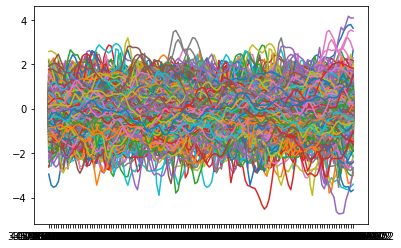

In [ ]:
ts = df[:]
plt.plot(ts.T)
plt.show()

In [ ]:
Xsca = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X)  # Rescale time series

In [ ]:
Xsca[0]

array([[ 0.31745536],
       [ 0.75013963],
       [ 1.12055672],
       [ 1.23073756],
       [ 1.18406549],
       [ 0.99965406],
       [ 0.47248385],
       [-0.04584405],
       [-0.04909311],
       [-0.07986335],
       [-0.12224063],
       [ 0.03038483],
       [ 0.05050671],
       [ 0.09416114],
       [ 0.13892063],
       [ 0.09095922],
       [-0.10884406],
       [-0.45134148],
       [-0.61814574],
       [-0.65259659],
       [-0.63152345],
       [-0.60865625],
       [-0.57351322],
       [-0.48014196],
       [-0.59427811],
       [-0.88395425],
       [-0.96657356],
       [-0.3707425 ],
       [ 0.34233848],
       [ 0.17149141],
       [-0.08767039],
       [-0.02735681],
       [-0.20783307],
       [-0.1671045 ],
       [-0.05425291],
       [-0.14593781],
       [-0.04609935],
       [-0.09268999],
       [-0.20007372],
       [-0.20281114],
       [-0.44783394],
       [-0.70433322],
       [-0.80797864],
       [-0.5732013 ],
       [-0.11164987],
       [ 0

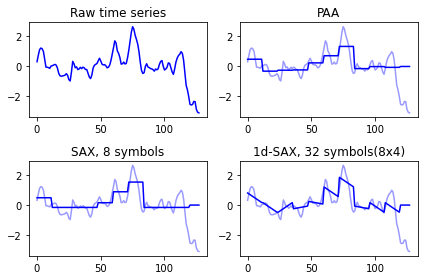

In [ ]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(Xsca)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(Xsca)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(Xsca)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(Xsca[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(Xsca[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(Xsca[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(Xsca[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

In [ ]:
ts1_paa = paa.fit_transform(Xsca)

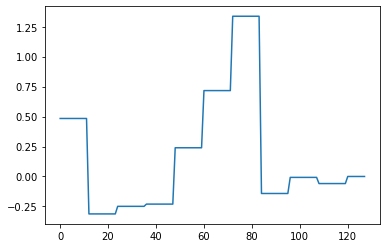

In [ ]:
plt.plot(paa.inverse_transform(ts1_paa)[0].ravel())

In [ ]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(Xsca)

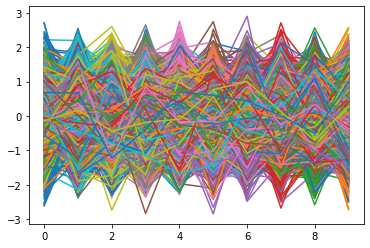

In [ ]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

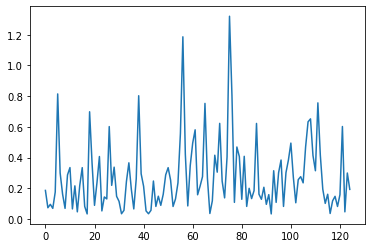

In [ ]:
w = 4
mp, mpi = matrixProfile.stomp(Xsca[2].ravel(), w)

plt.plot(mp)
plt.show()

# Motif Discovery

In [ ]:
mo, mod  = motifs.motifs(Xsca[2].ravel(), (mp, mpi), max_motifs=7)

In [ ]:
mo

[[17, 92], [31, 42], [67, 116], [13, 122], [3, 8]]

In [ ]:
mod

[0.03247230963100556,
 0.03353084926971681,
 0.03536889321970421,
 0.04596302628547781,
 0.06862069576453482]

In [ ]:
w = 4
mp, mpi = matrixProfile.stomp(Xsca[2].ravel(), w)
mo, mod  = motifs.motifs(Xsca[2].ravel(), (mp, mpi),max_motifs=7)

In [ ]:
w = 12
for i in range(11):
    mp, mpi = matrixProfile.stomp(Xsca[i].ravel(), w)
    mo, mod  = motifs.motifs(Xsca[i].ravel(), (mp, mpi), max_motifs=6)
    print(mo, mod)

[[54, 68], [38, 103], [2, 13, 76, 113], [46, 83]] [0.5964283213396295, 0.6299107408430942, 0.6584468649071576, 1.506241614644176]
[[2, 61], [12, 50, 75], [95, 107], [23, 37]] [0.5600979241801699, 0.6399829139576891, 0.8156607528190422, 1.1575471063666518]
[[9, 32, 44, 111], [69, 85, 100], [17, 24, 56]] [0.8096679709434156, 1.014190613705214, 1.245708460589855]
[[45, 96], [4, 81, 103], [22, 36, 73], [29, 63, 116]] [0.5920962229342502, 0.6623899336739917, 0.8490208265690777, 0.9095397524292745]
[[49, 64], [18, 40], [6, 81, 89], [25, 110], [32, 57]] [0.3875298859049304, 0.6881849357625839, 0.7384894396036323, 0.9115550838893297, 1.4446481935841906]
[[20, 28, 81, 112], [88, 103], [0, 46], [60, 70], [8, 39]] [0.752582378694685, 0.8627421354395162, 0.9115550838893677, 0.9184871597963954, 1.2652567435031497]
[[23, 38, 67, 110], [14, 47, 57, 87], [7, 75], [95, 102]] [0.7163525610788107, 0.9441361682549841, 1.6240525023975356, 1.995500752383423]
[[11, 50, 70], [23, 86, 107], [1, 43], [93, 114],

In [ ]:
w = 10
for i in range(11):
    mp, mpi = matrixProfile.stomp(Xsca[i].ravel(), w)
    mo, mod  = motifs.motifs(Xsca[i].ravel(), (mp, mpi), max_motifs=6)
    print(mo, mod)

[[39, 104], [54, 68], [10, 33, 110], [2, 60, 76], [16, 86, 116]] [0.28018280607132484, 0.4632522197815499, 0.5122677971878231, 0.5358063409009851, 1.008647627668217]
[[3, 62, 102], [42, 115], [12, 50, 75], [84, 91], [56, 108]] [0.46076164810439124, 0.5076527324565306, 0.5706912264679741, 0.6728495032995844, 0.6790006450122363]
[[34, 46, 113], [7, 79], [0, 40, 70, 87, 100], [20, 27]] [0.5145695053629358, 0.6354848967755452, 0.7266504110433597, 0.7482275628497632]
[[6, 22, 36, 83, 105], [49, 118], [28, 98], [63, 111]] [0.43903968757696915, 0.4823765829675769, 0.5812552687064353, 0.6889687391052607]
[[52, 67], [19, 41], [7, 89], [34, 61], [1, 25, 99, 110]] [0.3625201029637779, 0.4390396875768857, 0.6376805607003337, 0.7073977300282526, 0.8695486258527603]
[[0, 46, 91, 107], [20, 28, 57, 81], [40, 67, 113], [6, 74]] [0.5673126689069513, 0.5877686489973859, 0.8278749976863746, 1.284573103440611]
[[18, 58, 89], [25, 40, 69, 75, 112], [7, 106], [81, 118]] [0.5543500978172726, 0.58751790536266

In [ ]:
w = 8
for i in range(11):
    mp, mpi = matrixProfile.stomp(Xsca[i].ravel(), w)
    mo, mod  = motifs.motifs(Xsca[i].ravel(), (mp, mpi), max_motifs=10)
    print(mo, mod)

[[41, 106], [59, 73], [54, 67, 91], [3, 14, 78, 116], [35, 111], [49, 86]] [0.2347841404678822, 0.34455735182967884, 0.3663992215891885, 0.42367199192734556, 0.44204082637325626, 0.6750647612860352]
[[44, 106], [14, 52, 76], [5, 64, 93], [99, 111], [27, 85], [37, 57, 120], [0, 22]] [0.333016842982019, 0.36164020330638347, 0.38881769857833587, 0.540923883081522, 0.6402385314601868, 0.7236408421278815, 0.996456834331612]
[[9, 81, 111], [1, 29, 40, 51, 71, 87], [60, 100], [34, 46], [66, 94]] [0.3158447743512383, 0.42394999930877614, 0.48951665840824227, 0.5407358238641264, 0.7110570707200768]
[[85, 107], [17, 47], [100, 112, 118], [31, 64], [8, 23, 39, 76], [2, 90], [52, 58]] [0.09281974313626513, 0.3158447743512805, 0.317827400764844, 0.46795570113997204, 0.547150668139788, 1.0896820074691007, 1.235914813728019]
[[21, 43], [53, 63, 68, 117], [6, 85, 93], [1, 36, 48, 110], [11, 105], [79, 100]] [0.09281974313613117, 0.30414374340128414, 0.4334984170541149, 0.45700828653899495, 0.602785251

In [ ]:
w = 5
for i in range(11):
    mp, mpi = matrixProfile.stomp(Xsca[i].ravel(), w)
    mo, mod  = motifs.motifs(Xsca[i].ravel(), (mp, mpi), max_motifs=5)
    print(mo,mod)

[[57, 70], [11, 46], [38, 103], [5, 49, 80, 118]] [0.05838317281706461, 0.10407297575705689, 0.10708107302898935, 0.13289088339033345]
[[95, 106], [29, 62], [11, 75], [6, 66], [39, 111]] [0.033446704958892966, 0.07076309405296259, 0.08854118281860154, 0.09208749188367503, 0.10198818506975482]
[[31, 42], [67, 116], [3, 24, 90], [11, 84], [62, 102]] [0.03344670495793035, 0.06771639067270772, 0.16271544424839907, 0.18296423315016636, 0.1869855976329872]
[[85, 107], [3, 52], [113, 119], [65, 81, 102]] [0.05746533804739177, 0.06771639067282248, 0.1156547950154566, 0.15364436046168847]
[[21, 43], [0, 51, 56, 66], [17, 38], [71, 112], [13, 86]] [0.057465338047604286, 0.12384823426929609, 0.15364436046048174, 0.18777478666783687, 0.18999092329727088]
[[0, 65], [32, 60, 123], [5, 107], [12, 81], [69, 116]] [0.07024556898944251, 0.08538570612731752, 0.10021636975784484, 0.10670077581568187, 0.1367541518891331]
[[44, 116, 120], [30, 85, 110], [51, 58], [63, 99]] [0.10027517575434305, 0.1014544104

(By testing w from 4 to 12)
While reducing the number of w, the number of motifs does not exceed 6-7 when analyzing the first ten time series. Observing, instead, with w=4 in all ts, for each ts there are 6-9 motifs (With max_motifs=10). With w=8 same thing.
We decide to keep only max_motif=5 and a w of 10.

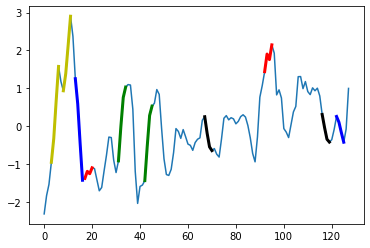

In [ ]:
plt.plot(Xsca[2].ravel())
colors = ['r', 'g', 'k', 'b', 'y','r','g'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = Xsca[2].ravel()[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

# Anomaly Detection

In [ ]:
anoms = discords(mp, ex_zone=3, k=10)

In [ ]:
anoms

array([ 75,  56,   5,  38, 111,  65,  18, 107,  71,  86])

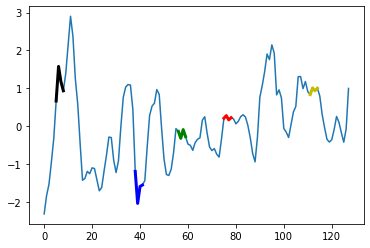

In [ ]:
plt.plot(Xsca[2].ravel())
colors = ['r', 'g', 'k', 'b', 'y','r','g','k','b','y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = Xsca[2].ravel()[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

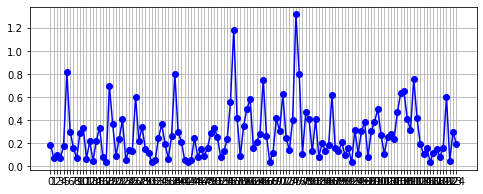

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(mp, marker='o', color='b')
plt.xticks(range(len(mp)))
plt.grid()
plt.show()